### K-MEANS ###

This note book is a study case to apply my learning about K-Means algorithms

Kmeans works better in quantitative datasets.  
It's recommended to have the columns with Normalization (MinMaxScaler) -> [0,1].  
Kmeans doesn't work well in **not espherical** datasets (to check it in multivariable datasets, we need to use PCA to trasform it into 2 componets to visualize it), and also when clusters have significantly different sizes.

Dataset dictionary
- **track_id**: The Spotify ID for the track  
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a  
- **album_name:** The album name in which the track appears  
- **track_name:** Name of the track  
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.  
- **duration_ms:** The track length in milliseconds  
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)  
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable  
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale  
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)  
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0  
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks  
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic  
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content  
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live  
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)  
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration  
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.  
- **track_genre:** The genre in which the track belongs  

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

# print("Path to dataset files:", path)

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

C:\Users\rafajovelho\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rafajovelho\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('dataset-spotify.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

(114000, 21)

In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
df.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

### Data Cleaning ###

As my goal here is to create a song cluster based on its characteristics, I will be removing rows that aren't useful for my model such as artists, track_id, album_name, etc.  
But before removing these columns, I will remove duplicated songs from the same artists (it can happen that the same song appears in more than 1 album, and they will have the same characteritcs causing future duplications)

In [7]:
# Removing song duplications (that might be in more than one album from the artist)
df1 = df.copy()
df1 = df.drop_duplicates(subset=['track_name','artists'])
df1.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
# now checking track_name duplicates (that can happen, and not necessarily refer to the same song)
df1[(df1.duplicated(subset='track_name'))].sort_values(by='track_name', ascending=True).head(20)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
79935,79935,1wl5b2lw3YagQtZiYZbQWP,Thelonious Monk,"Genius Of Modern Music (Vol.1, Expanded Edition)",'Round Midnight,54,193840,False,0.542,0.3200,...,-9.975,1,0.0387,0.907000,0.649000,0.0609,0.2060,116.648,4,piano
14923,14923,5u5Ncdztgu1nEuEc6ds28c,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),(Don't Fear) The Reaper,0,304268,False,0.450,0.7410,...,-8.903,0,0.0407,0.007970,0.000062,0.4070,0.4680,141.316,4,children
98236,98236,51HGVPqQYGY0gH8UPgZu84,Jessie Mueller;Beautiful Female Ensemble,Beautiful: The Carole King Musical (Original B...,(You Make Me Feel Like) A Natural Woman,30,130733,False,0.393,0.4840,...,-4.838,0,0.0290,0.652000,0.000000,0.1800,0.5050,101.515,3,show-tunes
77934,77934,2fmvtJUQ3kpGyk4W5vNnns,Dilsinho;Sorriso Maroto,Juntos (Ao Vivo),1 Metro e 65 - Ao Vivo,41,185840,False,0.516,0.8280,...,-6.133,1,0.0404,0.243000,0.000000,0.9060,0.4260,78.968,4,pagode
100660,100660,38NY49T4OlgIXjOSY1RKz8,Lars Frederiksen and the Bastards,Viking,1%,33,166466,False,0.331,0.9920,...,-2.725,0,0.0749,0.000615,0.000000,0.2100,0.8280,181.567,4,ska
113820,113820,6RZ8i45jxuvih2qeNfoUdv,Passion;Matt Redman,Passion: White Flag,"10,000 Reasons (Bless The Lord) - Live",40,350720,False,0.478,0.5240,...,-7.588,1,0.0267,0.121000,0.000000,0.6670,0.3200,72.502,4,world-music
110911,110911,0nJu3is8rdbac8Lk04XgBJ,Vini Vici;Pawan Nair,11:11,11:11,45,393529,False,0.532,0.9210,...,-7.104,1,0.0372,0.000956,0.887000,0.1900,0.0411,136.014,4,trance
60432,60432,1ZChjffp2JtRds6Jo2U8Qn,Alkaline,123 EP,123,23,183475,True,0.567,0.9200,...,-1.285,1,0.0701,0.171000,0.000000,0.4680,0.5750,171.050,4,j-dance
38188,38188,6Yu1OL8I0D4vjOzYdsXYGK,The Strokes,Room On Fire,12:51,65,153133,False,0.451,0.8890,...,-3.838,1,0.0379,0.312000,0.800000,0.5580,0.5920,145.056,4,garage
79571,79571,5utxu2AYfXzn3uHYrG29YF,Smyang Piano,"Piano Collection, Vol. 4",134340,38,171630,False,0.467,0.0918,...,-27.194,1,0.0389,0.994000,0.946000,0.0955,0.3770,110.455,4,piano


In [9]:
# it seems like problem was solved - we have what might be the same song, by sang by another artist, which is ok 
df1[(df1['track_name']=="(Don't Fear) The Reaper") | (df1['track_name']=="2009") | (df1['track_name']=="1969") | (df1['track_name']=="21 Guns	")].sort_values(by='track_name') # checking some examples

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8365,8365,5QTxFnGygVM4jFQiBovmRo,Blue Öyster Cult,Agents Of Fortune,(Don't Fear) The Reaper,76,308120,False,0.333,0.927,...,-8.550,0,0.0733,0.002900,0.000208,0.2970,0.3850,141.466,4,blues
14923,14923,5u5Ncdztgu1nEuEc6ds28c,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),(Don't Fear) The Reaper,0,304268,False,0.450,0.741,...,-8.903,0,0.0407,0.007970,0.000062,0.4070,0.4680,141.316,4,children
38824,38824,0pPqm8cBWogejpbpdFrexu,The Red Pears,"For Today, for Tomorrow, for What Is, for What...",1969,25,158103,False,0.575,0.400,...,-7.674,1,0.0598,0.000348,0.002630,0.0536,0.0724,110.199,4,garage
111519,111519,3JZjPBwqL5F4PE55nm8iNV,Boards of Canada,Geogaddi,1969,46,260466,False,0.667,0.730,...,-10.049,0,0.0421,0.000992,0.536000,0.3400,0.2070,147.324,4,trip-hop
39513,39513,1BXMNiVBXno1YbtQzeVMxG,Mijo,2009,2009,43,131702,False,0.446,0.685,...,-4.944,1,0.3960,0.147000,0.000000,0.2350,0.4500,194.820,4,german
42768,42768,6X6Ni1CBeM3rgIdLfBoE1o,Weekend Nachos,Unforgivable,2009,13,61746,False,0.166,0.856,...,-4.745,1,0.0805,0.000130,0.958000,0.5310,0.1410,76.366,3,grindcore


I'll now remove the string columns

In [10]:
# droping string columns
df1 = df1.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name','track_genre'], axis = 1)

In [11]:
# I still have one boolean column (explicit), which I'll transform to 1(True) and 0(False) 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81344 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        81344 non-null  int64  
 1   duration_ms       81344 non-null  int64  
 2   explicit          81344 non-null  bool   
 3   danceability      81344 non-null  float64
 4   energy            81344 non-null  float64
 5   key               81344 non-null  int64  
 6   loudness          81344 non-null  float64
 7   mode              81344 non-null  int64  
 8   speechiness       81344 non-null  float64
 9   acousticness      81344 non-null  float64
 10  instrumentalness  81344 non-null  float64
 11  liveness          81344 non-null  float64
 12  valence           81344 non-null  float64
 13  tempo             81344 non-null  float64
 14  time_signature    81344 non-null  int64  
dtypes: bool(1), float64(9), int64(5)
memory usage: 9.4 MB


In [12]:
df1['explicit'] = np.where(df1['explicit']== True, 1,0)

In [13]:
# checking by na values in the dataset
df1.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [14]:
# based on the dictionary, colum key represent 'na' values by -1, so I'm going to check if we have that happenning in this dataset
df1[(df['key']==-1)]

C:\Users\rafajovelho\AppData\Local\Temp\ipykernel_32468\3893254898.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[(df['key']==-1)]


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [15]:
# Checking if there are still duplicated values
df1.duplicated().sum()

27

In [16]:
#removing those remaining duplicated values (from what I checked they are same songs from different artirts but with same the exactly same characteristics)
df1 = df1.drop_duplicates(keep='first')
df1.duplicated().sum()

0

### Pre Processing ###

In [17]:
df1.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81317.000000,8.131700e+04,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000
mean,34.639706,2.314209e+05,0.085542,0.559313,0.635070,5.286152,-8.592019,0.632316,0.089005,0.329620,0.184678,0.219718,0.463333,122.155831,3.897156
std,19.436773,1.165024e+05,0.279688,0.177705,0.258589,3.557592,5.299833,0.482178,0.116642,0.339924,0.331554,0.198263,0.263374,30.117082,0.455574
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738760e+05,0.000000,0.446000,0.455000,2.000000,-10.451000,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.432000,4.000000
50%,35.000000,2.152080e+05,0.000000,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.031000,4.000000
75%,49.000000,2.673460e+05,0.000000,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.152000,0.283000,0.676000,140.130000,4.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


As recommended by the book "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow," I will perform **scaling** (Normalization [0,1]) of the data.  
Since K-Means uses Euclidean distance to form clusters, these distances are sensitive to the scale of the variables. It is more advisable to use the method that keeps the values between 0 and 1 (Standardization would also not be incorrect, but in this case, since we already have several variables that are appropriately scaled within the 0 to 1 range, I will opt for Normalization).

In [18]:
scaler = MinMaxScaler()
columns_to_scale = ['popularity','duration_ms','key','loudness','tempo','time_signature']

df2 = df1.copy() # creation a new df for this section
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
df2.describe() # Confirming it was properly scaled

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000,81317.000000
mean,0.346397,0.044187,0.085542,0.559313,0.635070,0.480559,0.757246,0.632316,0.089005,0.329620,0.184678,0.219718,0.463333,0.501931,0.779431
std,0.194368,0.022245,0.279688,0.177705,0.258589,0.323417,0.098031,0.482178,0.116642,0.339924,0.331554,0.198263,0.263374,0.123749,0.091115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210000,0.033200,0.000000,0.446000,0.455000,0.181818,0.722860,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,0.408560,0.800000
50%,0.350000,0.041091,0.000000,0.573000,0.678000,0.454545,0.781847,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,0.501418,0.800000
75%,0.490000,0.051047,0.000000,0.690000,0.857000,0.727273,0.821098,1.000000,0.087000,0.629000,0.152000,0.283000,0.676000,0.575785,0.800000
max,1.000000,1.000000,1.000000,0.985000,1.000000,1.000000,1.000000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,1.000000,1.000000


### Defining Kmeans clusters number  ###

número de inicialização de centroide aleatória é representada pelo hiperparamêmtro n_init (default = 10). The best solution is based on the _inertia_ metrics (distancia quadrada media de cada instancia do centroide - quanto menor melhor. we can check this value by _kmeans.inertia___.  the _kmeans.score(X)_ return the negative value of inertia, so it can follow the rule 'the bigger the better') and it is saved in the model.  
  
We shouldn't use the inertia metrics alone to select the best number of cluster 'k' for our model, because the more clusters we have, the lower the inertia metrics is, because the instances will get closer to the centroid, therefore, we will have always a lower inertia.  
Inertia is used in the Elbow curve though. We can use the Elbow curve to define the optimized number of cluster (choose where inertia stop dropping significantly, at the bend (elbow) of the curve). However, *this is not the best approach chose the number of cluster 'k' of our model.*  

A more precise approach is to use the _silhouette score_ ((b-a)/max(a,b), where *a ->* average distance from the other instances within the same clusters; *b ->* average distance to instances of the nearest neighboring cluster (excluding its own cluster)).  
The silohuette score can vary from -1 to +1. A coefficient close to +1 means that the instance is within its own cluster and far from other clusters (therefore, good). A coefficient close to 0 indicates that the instance is near a cluster boundary. Finally, a coefficient close to -1 suggests that the instance may have been assigned to the wrong cluster.  
To calculate the Silhouette coeficient use _silhouette_score_ from sklearn.metrics -> silhouette_score(X, kmeans.labels_).  
To better understand the silhouette coefficient, it's recommended to plot the *Silhouette Diagram*. The height of indicates the number of instances the cluster contains, and its width indicates the Silhouette coefficient of the instancies classified in the cluster (the wider, the better).  

In [19]:
# As the dataset is still very big and this is for study purpose only, I'll only work with 25% of the dataset
X_scaled = df2.sample(frac=0.25, random_state=19)
X_scaled.shape

(20329, 15)

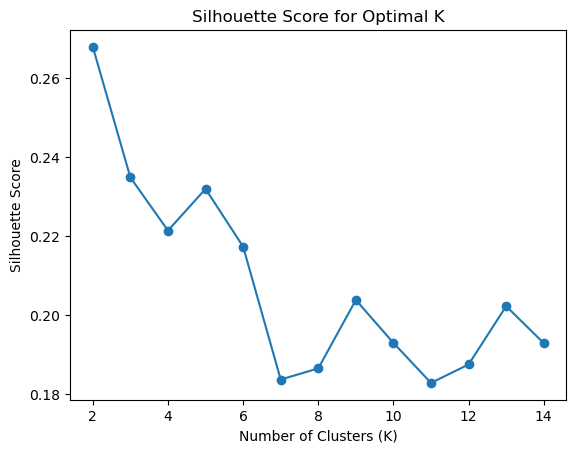

In [20]:
### Silhouette score 


sil_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=19, init='k-means++')
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 15), sil_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


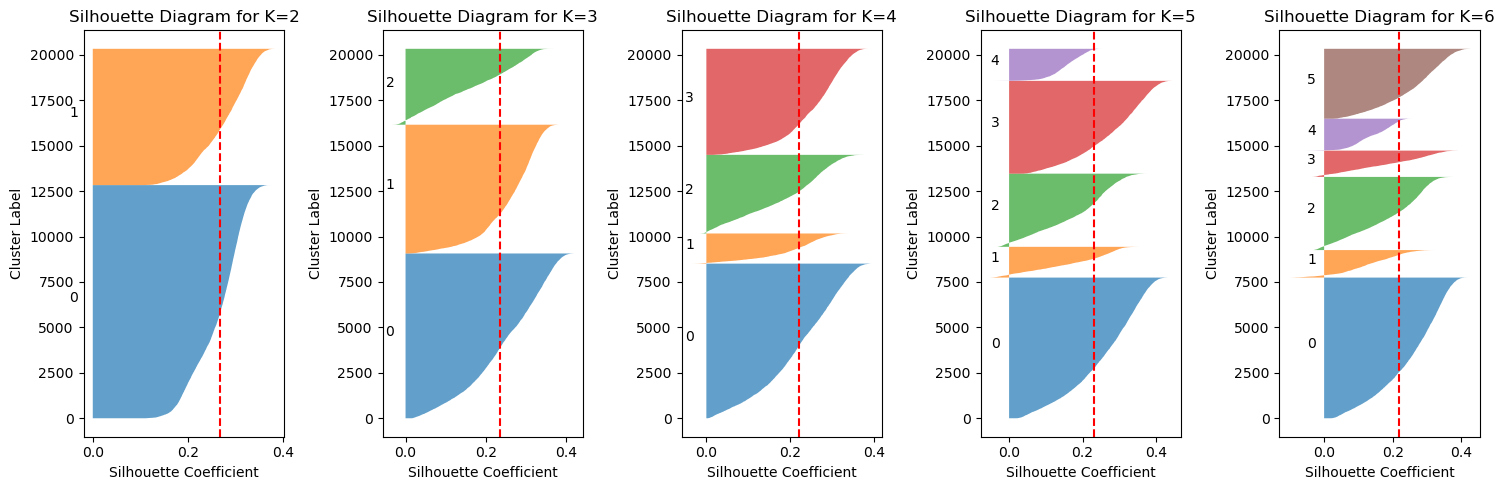

In [21]:
# Now I want to plot a Silhouette diagram for the k = 2-6
# Define the range of K
K_range = range(2, 7) # exclude last number

# Plot silhouette diagrams for each K
#fig, axes = plt.subplots(nrows=len(K_range), figsize=(8, 6 * len(K_range)))
#fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
fig, axes = plt.subplots(nrows=1, ncols=len(K_range), figsize=(15, 5))  # 1 linha, 5 colunas
# na linha acima criei a figura(fig) e os eixos (axes)



for ax, optimal_k in zip(axes, K_range):
    # Apply KMeans for the current value of K
    kmeans = KMeans(n_clusters=optimal_k, random_state=19, init='k-means++')
    cluster_labels = kmeans.fit_predict(X_scaled) # -> Cluster labels 
    
    # Compute silhouette values for the current clustering
    silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
    
    # Initialize variables for plotting
    y_lower, y_upper = 0, 0
    for i in range(optimal_k):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()
        
        y_upper += len(cluster_silhouette_vals)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
        y_lower = y_upper
    
    # Plot the average silhouette score (red dashed line)
    ax.axvline(x=silhouette_score(X_scaled, cluster_labels), color="red", linestyle="--")
    
    # Format the plot
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.set_title(f"Silhouette Diagram for K={optimal_k}")

# Adjust the layout
plt.tight_layout()
plt.show()


> Todos os Clusters não apresentaram uma distribuição muito uniforme entre os Clusters. Optarei por seguir com o numero de Clusters k=2 (é o que teve maior coeficiente de Silhouette)

> Significado do _Silhouette Score_: Silhouette score mede o quão bem os dados estão agrupados dentro dos clusters e quão distantes estão entre os diferentes clusters. Um valor baixo no Silhouette pode indicar que os clusters não estão bem definidos e podem ser um sinal de que o KMeans não está capturando adequadamente a estrutura dos dados.

Ploting Elbow Curve only for learning purpose

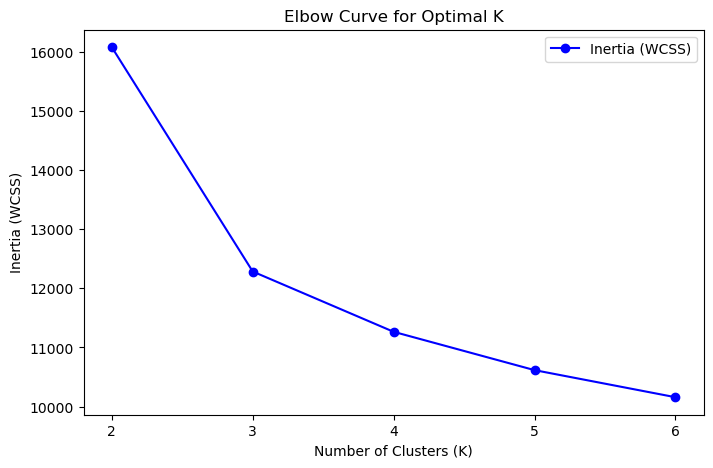

In [22]:

# Define range of K values to test
K_range = range(2, 7)  # Trying K from 2 to 10

# Store inertia values for each K
inertia_values = []

# Compute KMeans for each K and store the inertia
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)  # Store inertia (WCSS)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o', linestyle='-', color='b', label="Inertia (WCSS)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Curve for Optimal K")
plt.xticks(np.arange(min(K_range), max(K_range)+1, 1))
plt.legend()
plt.show()


> we can see that by the elbow curve approach, we'd also stick with 2 clusters

In [23]:
# Creating the clustering model
kmeans = KMeans(n_clusters=2, random_state=19, init='k-means++')

#cluster_labels = kmeans.fit_predict(X_scaled) # -> Cluster labels 

In [24]:
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=19)

In [25]:
# Showing the inertia and score(-inertia) only for study purpose
print(f'inertia: {kmeans.inertia_}')
print(f'score: {kmeans.score(X_scaled)}')

inertia: 14109.277372491058
score: -14109.277372491058


Plotting Kmeans with PCA

Coordenadas dos centróides após PCA:
[[ 0.36397388 -0.07042799]
 [-0.62258945  0.12046942]]


C:\Users\rafajovelho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


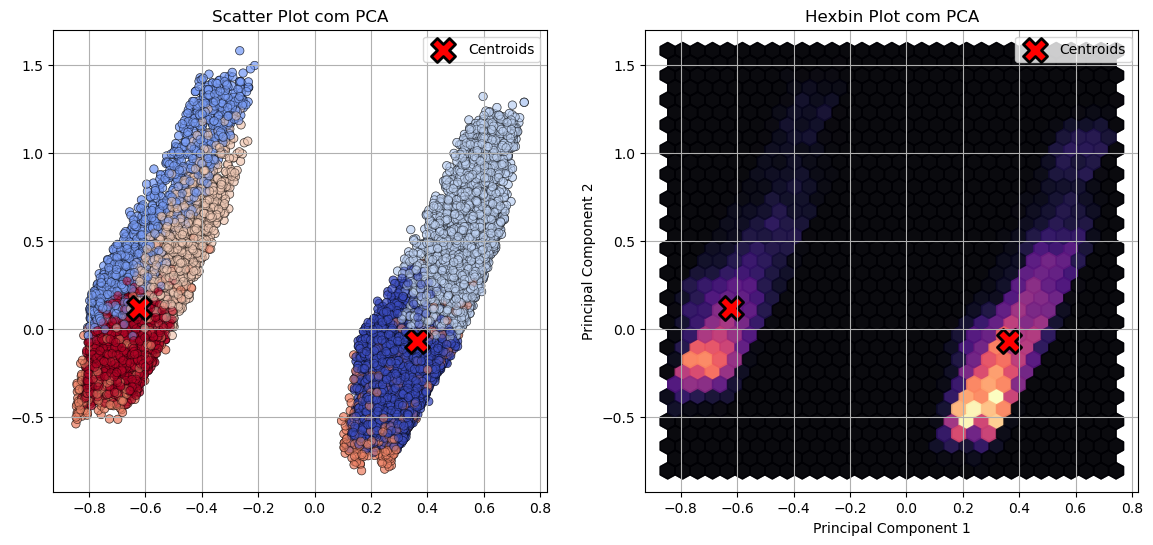

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) # vou usar para plotar as instancias no scatter
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transformar os centróides para enocntrar eles no scatter


# Plot clusters
#plt.figure(figsize=(8, 6)) # -> if I wanted to have only one plot (scatter or hexbin)
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # using two subplot to see the scatter and also the hexbin, so I can see where my instances are concentrated (density)

#scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='coolwarm', alpha=0.5, edgecolors='k', linewidths=0.5) # plotting all instances of the first and the second PCA -> if I wanted to plot only scatter
#scatter= plt.hexbin(X_pca[:, 0], X_pca[:, 1], gridsize=30, cmap='magma', alpha=0.8) -> if I wanted to plot only hex bin


# Scatter in the first subplot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='coolwarm', alpha=0.5, edgecolors='k', linewidths=0.5)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', edgecolors='black', linewidths=2, label="Centroids")
axes[0].set_title("Scatter Plot com PCA")

# Hexbin plot in the second subplot
hb = axes[1].hexbin(X_pca[:, 0], X_pca[:, 1], gridsize=30, cmap='magma', alpha=0.8)
axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', edgecolors='black', linewidths=2, label="Centroids")
axes[1].set_title("Hexbin Plot com PCA")


#scatter = plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', edgecolors='black', linewidths=2, label="Centroids") # plotting the centroids -> if wanted only one plot

# Scatter plot no primeiro subplot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='coolwarm', alpha=0.5, edgecolors='k', linewidths=0.5) # plotando as instancia do scatter
scatter_centroids1 = axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', edgecolors='black', linewidths=2, label="Centroids") # indicando o centroide do scatter
axes[0].set_title("Scatter Plot com PCA")# titulo do primeiro plot

# Hexbin plot no segundo subplot
hb = axes[1].hexbin(X_pca[:, 0], X_pca[:, 1], gridsize=30, cmap='magma', alpha=0.8) # plotando as instancia do scatter
scatter_centroids2 = axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', edgecolors='black', linewidths=2, label="Centroids")# indicando o centroide do scatter
axes[1].set_title("Hexbin Plot com PCA") # titulo do segundo plot


print("Coordenadas dos centróides após PCA:")
print(centroids_pca) # para visualização

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.title(f"K-Means Clustering (K=2)") # -> if wanted only one plot
#plt.legend() # -> if wanted only one plot
axes[0].legend([scatter_centroids1], ["Centroids"]) # centroide plot1 
axes[1].legend([scatter_centroids2], ["Centroids"]) # centroide plot2
#plt.grid(True)# -> if wanted only one plot
axes[0].grid(True)
axes[1].grid(True)


plt.show()

Apesar de no caso acima a distribuição dos dados estar em forma eliptica, que não é o ideal na clusterização de Kmeans - isso pq o Kmeans utiliza-se de distâncias Euclidianas e o formato elíptico indica que os pontos não estão uniformemente distribuídos em torno do centroide - (isso também é pode ser visto no baixo valor do Silhouette score), é possível verificar que a segmentacao dos dados realizada pelo modelo mostra que os clusters estão bem distintos entre si, o que indica uma boa performace do modelo.    
Talvez um algoritmo de clusterização Gaussiano pudesse performar melhor, porém tivemos uma boa clusterização.

In [27]:
print(f'these values reffer to the kmeans before pca clusters (in this example, for variable 1 and 2 - we have 15 in total): {kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]}')
print(f'all variables cluster centers: {kmeans.cluster_centers_}')

print(f'shape do centroides do Kmeans: {kmeans.cluster_centers_.shape} -> eixo x e y (2) das 15 variáveis do dataset')
print(f'shape do centroides do PCA: {centroids_pca.shape} -> eixo x e y (2) de dois clusters PCA') # 

these values reffer to the kmeans before pca clusters (in this example, for variable 1 and 2 - we have 15 in total): (array([0.34452179, 0.34672533]), array([0.04377807, 0.04522024]))
all variables cluster centers: [[ 3.44521787e-01  4.37780676e-02  8.29370956e-02  5.50557877e-01
   6.21394060e-01  4.42017021e-01  7.53950157e-01  1.00000000e+00
   8.64940136e-02  3.52802137e-01  1.75438497e-01  2.22730536e-01
   4.67631680e-01  5.02570951e-01  7.78080910e-01]
 [ 3.46725333e-01  4.52202440e-02  9.36000000e-02  5.73852280e-01
   6.63344789e-01  5.41854545e-01  7.63755826e-01 -5.55111512e-15
   9.51536533e-02  2.84875197e-01  1.95742423e-01  2.11885933e-01
   4.55155119e-01  5.03774276e-01  7.84053333e-01]]
shape do centroides do Kmeans: (2, 15) -> eixo x e y (2) das 15 variáveis do dataset
shape do centroides do PCA: (2, 2) -> eixo x e y (2) de dois clusters PCA


Agora tentar identificar as caracteristicas desses dois cluster distintos pelo gênero das instancias de cada um dos clusters, se eles tem alguma similirade entre eles (ex: se um está relacionado a musica mais calmas enquanto o outros está relacionado a musicas mais agitadas)

In [28]:
X_scaled_labels = X_scaled.copy()
X_scaled_labels['labels'] = kmeans.labels_
X_scaled_labels.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,labels
75967,0.19,0.046570,0,0.422,0.0176,0.454545,0.463404,1,0.0398,0.9370,0.9290,0.105,0.0489,0.492785,0.8,0
94463,0.56,0.023567,1,0.742,0.5160,0.727273,0.675434,1,0.0805,0.0163,0.0000,0.104,0.6790,0.575095,0.8,0
13112,0.15,0.053702,0,0.647,0.4400,1.000000,0.635351,0,0.0379,0.0175,0.0364,0.103,0.6440,0.484998,0.8,1
9098,0.00,0.041637,0,0.565,0.6100,0.000000,0.671346,1,0.0372,0.5680,0.0000,0.245,0.9210,0.384202,0.8,0
94538,0.51,0.033274,0,0.418,0.5760,0.818182,0.780571,0,0.0335,0.2000,0.0000,0.153,0.2540,0.379164,0.6,1


In [29]:
# Supondo que df e X_scaled_labels têm o índice diferente, mas queremos combinar com base no índice
df_with_labels = pd.merge(df, X_scaled_labels[['labels']], left_index=True, right_index=True, how='left')
df_with_labels = df_with_labels[~(df_with_labels['labels'].isna())] # tirando os registros que nao foram usados no kmeans, portanto não tem label

In [30]:
df_with_labels.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,labels
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,1,0.0557,0.210,0.000000,0.1170,0.1200,76.332,4,acoustic,0.0
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic,0.0
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,1,0.0417,0.559,0.000000,0.0973,0.7120,150.960,4,acoustic,0.0
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,...,1,0.0295,0.426,0.004190,0.0735,0.1960,78.899,4,acoustic,0.0
14,14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133,False,0.755,0.780,...,1,0.0327,0.124,0.000028,0.1210,0.3870,120.004,4,acoustic,0.0


In [31]:
df_with_labels.shape

(20329, 22)

In [32]:
df_with_labels['labels'].value_counts()

labels
0.0    12829
1.0     7500
Name: count, dtype: int64

Visualizando os Generos em cada Label

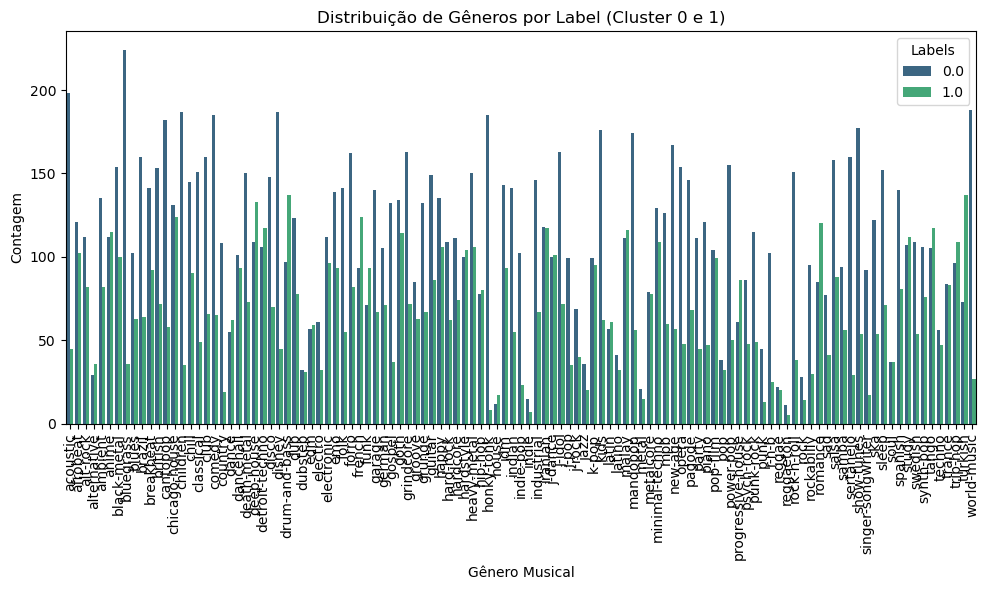

In [33]:
# Plotando os gêneros para os labels 0 e 1
plt.figure(figsize=(10, 6))
sns.countplot(data=df_with_labels, x='track_genre', hue='labels', palette='viridis')

# Ajustando o gráfico
plt.xticks(rotation=90)  # Rotacionando as categorias no eixo x para melhor visualização
plt.title('Distribuição de Gêneros por Label (Cluster 0 e 1)')
plt.xlabel('Gênero Musical')
plt.ylabel('Contagem')
plt.legend(title='Labels', loc='upper right')
plt.tight_layout()
plt.show()


Há muitos Gêneros diferentes

In [34]:
print(f"Número de gêneros únicos: {len(df_with_labels['track_genre'].unique())}")

Número de gêneros únicos: 113


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_with_labels, x='labels', hue='track_genre', palette='viridis')

Irei tentar fazer a junção de Gêneros parecidos para reduzir o numero de gêneros únicos o máximo possível

In [38]:
df_with_labels['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [47]:
# I'll use a dict found in someones' jupyter from Kaggle to generalize and decrease the number of genres and ease our visualization
replacement_dict = {
    'edm' : ['club', 'electro', 'breakbeat', 'drum-and-bass',
            'house', 'chicago-house', 'deep-house', 'garage',
            'dubstep', 'progressive-house', 'techno',
            'detroit-techno', 'hardcore', 'hardstyle',
            'idm', 'minimal-techno', 'trance'],
    'pop' :['indie-pop', 'power-pop', 'synth-pop'],
    'rock' :['hard-rock', 'industrial', 'psych-rock',
            'rock-n-roll', 'rockabilly', 'alt-rock',
            'grunge'],
    'metal' : ['black-metal', 'death-metal', 'grindcore',
              'heavy-metal', 'metalcore'],
    'punk' : ['punk-rock', 'emo', 'goth'],
    'latin' : ['forro', 'mpb', 'pagode', 'samba', 'sertanejo',
               'latino', 'tango', 'salsa', 'spanish', 'brazil'],
    'jamaica' : ['dancehall', 'dub', 'reggae', 'reggaeton',
                'ska'],
    'china' : ['cantopop', 'mandopop'],
    'country' : ['bluegrass', 'honky-tonk', 'blues', 'groove'],
    'japan' : ['anime', 'j-dance', 'j-idol', 'j-pop',
              'j-rock'],
    'children' : ['kids'],
    'jazz' : ['jazz', 'soul', 'r-n-b'],
    'funk' : ['funk', 'disco', 'hip-hop', 'trip-hop'],
    'ambient' : ['new-age'],
    'show-music' : ['disney', 'show-tunes', 'pop-film']
}

In [ ]:
# Generalizing music genre
for i in replacement_dict:
    for j in replacement_dict[i]:
        df_with_labels.replace({'track_genre': j}, i, inplace = True) # look in column 'track_genre' for where value is 'j' and replace it by 'i' -> eg: where genre is club and chage it to 'edm' 

In [58]:
df_with_labels['track_genre'].unique()

array(['acoustic', 'afrobeat', 'rock', 'alternative', 'ambient', 'japan',
       'metal', 'country', 'latin', 'edm', 'british', 'china', 'children',
       'chill', 'classical', 'comedy', 'dance', 'jamaica', 'funk',
       'show-music', 'electronic', 'punk', 'folk', 'french', 'german',
       'gospel', 'guitar', 'happy', 'indian', 'pop', 'indie', 'iranian',
       'jazz', 'k-pop', 'malay', 'opera', 'party', 'piano', 'romance',
       'sad', 'singer-songwriter', 'sleep', 'study', 'swedish', 'turkish',
       'world-music'], dtype=object)

In [59]:
df_with_labels['track_genre'].value_counts()

track_genre
edm                  3201
latin                2087
rock                 1267
metal                1161
japan                 906
country               893
funk                  745
punk                  702
show-music            666
jamaica               629
pop                   582
china                 470
children              460
ambient               441
jazz                  257
comedy                250
acoustic              243
happy                 241
guitar                235
iranian               235
chill                 235
malay                 227
british               225
sleep                 223
afrobeat              223
study                 219
french                217
world-music           215
turkish               210
electronic            208
romance               205
opera                 202
classical             200
folk                  196
indian                196
k-pop                 194
german                176
gospel                169


In [61]:
df_with_labels.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'labels'],
      dtype='object')

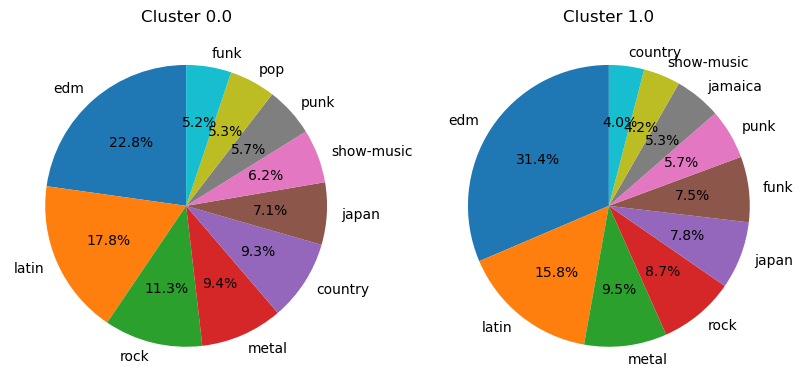

In [80]:
# Plot dos top 1- generos

# Número de clusters
num_clusters = df_with_labels['labels'].nunique()

# Criando gráficos de pizza para cada cluster
fig, axes = plt.subplots(1, num_clusters, figsize=(5 * num_clusters, 6))

for i, cluster in enumerate(sorted(df_with_labels['labels'].unique())):
    genre_counts = df_with_labels[df_with_labels['labels'] == cluster]['track_genre'].value_counts().nlargest(10)  # Pega os 10 mais comuns
    
    axes[i].pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%", startangle=90)
    axes[i].set_title(f"Cluster {cluster}")

plt.show()


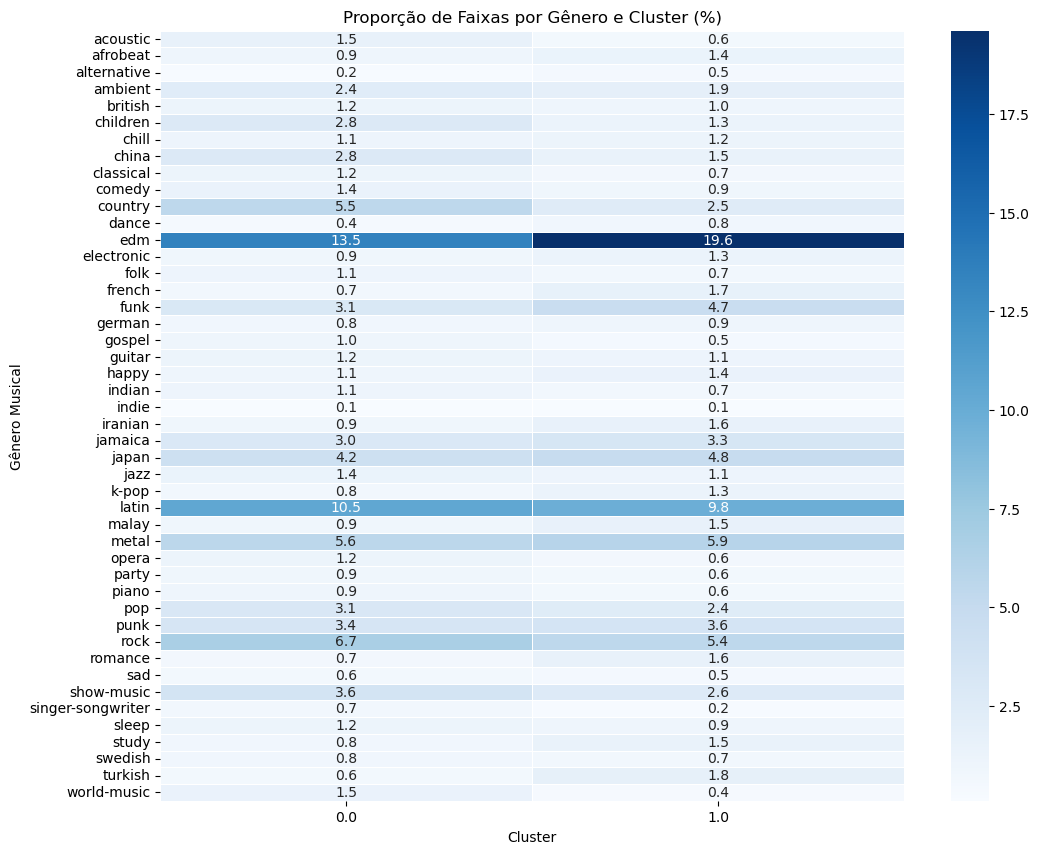

In [82]:
# Heatmap plot for % of each cluster
# Criando uma tabela cruzada (pivot table) com contagens absolutas
pivot_table = df_with_labels.pivot_table(index="track_genre", columns="labels", aggfunc="size", fill_value=0)

# Convertendo para percentuais dentro de cada cluster
pivot_table_percent = pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100

# Plotando o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table_percent, cmap="Blues", linewidths=0.5, annot=True, fmt=".1f")

plt.xlabel("Cluster")
plt.ylabel("Gênero Musical")
plt.title("Proporção de Faixas por Gênero e Cluster (%)")
plt.show()


Não foi possível enxergar muito bem uma diferença clara por meio desta relação genêro vs cluster

Tentarei visualizar a diferença nas outras variáveis que dizem respeito a caracteristicas das músicas

In [85]:
df_with_labels[(df_with_labels['labels'] == 0)].describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,labels
count,12829.000000,12829.000000,1.282900e+04,12829.000000,12829.000000,12829.000000,12829.000000,12829.0,12829.000000,12829.000000,12829.000000,12829.000000,12829.000000,12829.000000,12829.000000,12829.0
mean,53173.422558,34.452179,2.292787e+05,0.550558,0.621394,4.862187,-8.770193,1.0,0.086494,0.352802,0.175438,0.222731,0.467632,122.311697,3.890405,0.0
std,33334.242379,19.034814,1.195103e+05,0.176142,0.264401,3.510134,5.375098,0.0,0.120029,0.347576,0.326435,0.201443,0.264305,30.355717,0.455188,0.0
min,2.000000,0.000000,1.782600e+04,0.000000,0.000019,0.000000,-43.714000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,23143.000000,21.000000,1.712800e+05,0.437000,0.430000,2.000000,-10.686000,1.0,0.035100,0.017100,0.000000,0.099100,0.245000,99.514000,4.000000,0.0
50%,50598.000000,34.000000,2.137200e+05,0.563000,0.661000,5.000000,-7.417000,1.0,0.047300,0.228000,0.000048,0.134000,0.454000,122.115000,4.000000,0.0
75%,80223.000000,48.000000,2.629730e+05,0.679000,0.850000,8.000000,-5.237000,1.0,0.081200,0.680000,0.095800,0.286000,0.680000,141.326000,4.000000,0.0
max,113998.000000,94.000000,4.789026e+06,0.984000,1.000000,11.000000,1.795000,1.0,0.963000,0.996000,1.000000,0.994000,0.994000,220.525000,5.000000,0.0


In [86]:
df_with_labels[(df_with_labels['labels'] == 1)].describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,labels
count,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.0,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.0
mean,53818.191600,34.672533,2.368318e+05,0.573852,0.663345,5.960400,-8.240069,0.0,0.095154,0.284875,0.195742,0.211886,0.455155,122.604553,3.920267,1.0
std,33348.142519,19.838707,1.063375e+05,0.179412,0.241926,3.532284,4.962272,0.0,0.113732,0.321814,0.336181,0.189183,0.259845,29.453094,0.421188,0.0
min,24.000000,0.000000,0.000000e+00,0.000000,0.000020,0.000000,-43.957000,0.0,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000,1.0
25%,25010.500000,20.000000,1.784158e+05,0.460000,0.508000,3.000000,-10.005000,0.0,0.038100,0.011200,0.000000,0.096975,0.236750,99.989750,4.000000,1.0
50%,49536.000000,35.000000,2.182515e+05,0.592000,0.709000,6.000000,-7.052500,0.0,0.053100,0.135000,0.000226,0.131000,0.443500,122.994500,4.000000,1.0
75%,80437.750000,50.000000,2.742372e+05,0.708000,0.865000,9.000000,-5.018000,0.0,0.097600,0.513000,0.240000,0.272000,0.663000,140.049250,4.000000,1.0
max,113999.000000,94.000000,3.876276e+06,0.981000,1.000000,11.000000,1.821000,0.0,0.960000,0.996000,1.000000,0.989000,0.995000,216.558000,5.000000,1.0


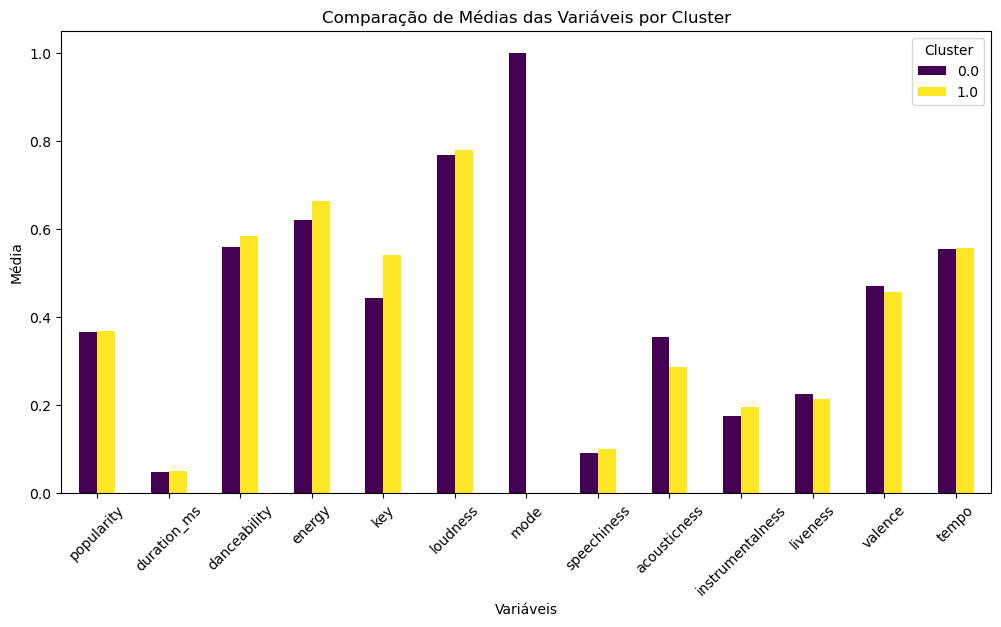

In [101]:
import matplotlib.pyplot as plt

# Normalizar os dados para ficarem na mesma escala no gráfico
df_visualize = df_with_labels.copy()
columns_to_scale = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 
     'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
     'valence', 'tempo']
df_visualize[columns_to_scale] = scaler.fit_transform(df_visualize[columns_to_scale])


# Calculando a média de cada variável por cluster
means = df_visualize.groupby('labels')[
    columns_to_scale
].mean()

# Criando um gráfico de barras agrupado
means.T.plot(kind='bar', figsize=(12, 6), colormap='viridis')

plt.xlabel("Variáveis")
plt.ylabel("Média")
plt.title("Comparação de Médias das Variáveis por Cluster")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()


In [123]:
# tabela de comparacao sem normalização
# passar duration_ms para segundo para melhor leitura
df_with_labels['duration_sec'] = df_with_labels['duration_ms']/1000
columns_to_scale.append('duration_sec')
means = df_with_labels.groupby('labels')[
    columns_to_scale
].mean().round(2)
means

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec
labels,,,,,,,,,,,,,,,,,,,,,
0.0,34.45,229278.65,0.55,0.62,4.86,-8.77,1.0,0.09,0.35,0.18,...,0.47,122.31,229.28,229.28,229.28,229.28,229.28,229.28,229.28,229.28
1.0,34.67,236831.76,0.57,0.66,5.96,-8.24,0.0,0.10,0.28,0.20,...,0.46,122.60,236.83,236.83,236.83,236.83,236.83,236.83,236.83,236.83


In [103]:
# tabela de comparacao sem normalização
means = df_visualize.groupby('labels')[
    columns_to_scale
].mean().round(2)
means

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
labels,,,,,,,,,,,,,
0.0,0.37,0.05,0.56,0.62,0.44,0.77,1.0,0.09,0.35,0.18,0.22,0.47,0.55
1.0,0.37,0.05,0.58,0.66,0.54,0.78,0.0,0.10,0.29,0.20,0.21,0.46,0.56


In [98]:
df_with_labels[(df_with_labels['labels'] == 1)]['mode'].value_counts()

mode
0    7500
Name: count, dtype: int64

In [99]:
df_with_labels[(df_with_labels['labels'] == 0)]['mode'].value_counts()

mode
1    12829
Name: count, dtype: int64

Cada cluster possui apenas um tipo de 'mode' de musica ('maior' para o cluster 0 e 'menor' para o cluster 1) e esse foi basicamente a maior diferença entre os clusters, pois todas as outras variáveis tiveram um média parecida.  
As variáveis que tiveram um valor mais diferente entre as labels foram a de 'key', mas essa não é uma boa variável para comparar visto que é relacionado a notas musicais, e também a coluna 'acostucness', onde foi possivel identificar que o cluster 0 possuia musicas mais instrumentais/acusticas